# Simple implementation of MNIST by Hugo

In [7]:
import torch
from torch import nn
import torch.nn.functional as F
from torchvision import datasets, transforms  # Consists datasets, model architectures, image transformations for computer vision
from torch import optim

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt

import helper    # Not a standard library but one created by Udacity

Here we'll use the MNIST tdataset which consists of greyscale handwritten digits. Each image is 28x28 pixels. We only need the train dataset for this example.
* Definine a transform function which converts the PIL data to tensors and does some normalization. Normalization requires mean and standard deviation. Each is a tuple with values for each channel. Our image has only one channel therefore it is (0.5,)
* Dowload the dataset and do the transformation. The first argument is where you want to store the data, download=True means that we want to save the data locally, train=True means download the training set and not the testingset
* Convert into an dataloader. The batch size is the number of images we get in one iteration from the data loader and pass through our network, often called a batch. And shuffle=True tells it to shuffle the dataset every time we start going through the data loader again. 

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,)),
                              ])
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

Looking at the data we got in a few different ways. 
* trainloader is a special type of object
* trainiter is now a iterable object 
* the shape has 64 rows which is consistent with the batch size. Then for the image we see that we have 1 channel and 28X28 pixels

trainloader is a: <torch.utils.data.dataloader.DataLoader object at 0x0000021528710A88>
dataiter is a: <class 'torch.utils.data.dataloader._SingleProcessDataLoaderIter'>
images is a: <class 'torch.Tensor'> and labels is a: <class 'torch.Tensor'>
Shape of image: torch.Size([64, 1, 28, 28]) and labels: torch.Size([64])


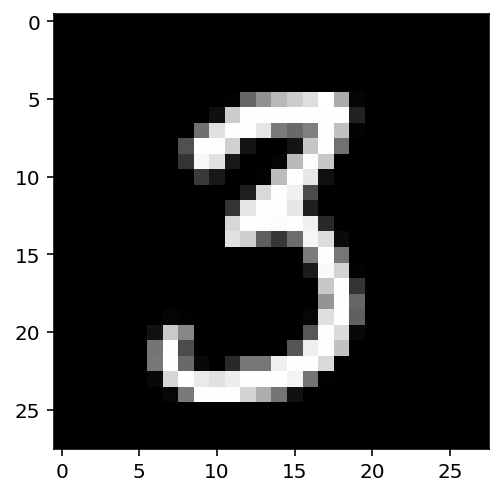

In [12]:
dataiter = iter(trainloader)       # iter() function returns an iterator for the given object
images, labels = dataiter.next()   # Grabing one batch from iterator
print(f"trainloader is a: {trainloader}\ndataiter is a: {type(dataiter)}")
print(f"images is a: {type(images)} and labels is a: {type(labels)}")
print(f"Shape of image: {images.shape} and labels: {labels.shape}")

plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [3]:
# Building the model
model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [4]:
epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)   # Flatten MNIST images into a 784 long vector
    
        optimizer.zero_grad()                       # Reset the gradients during each epoch
        outputs = model.forward(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")

Training loss: 1.9120439270666159
Training loss: 0.8432078731657345
Training loss: 0.5077605698980502
Training loss: 0.4214693159500419
Training loss: 0.3816305567651415


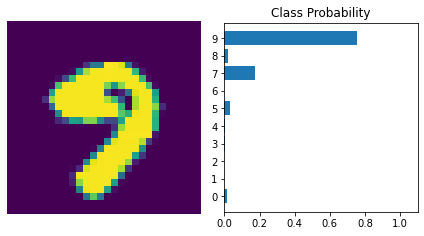

In [5]:
images, labels = next(iter(trainloader))

img = images[0].view(1, 784)    # flatten
# Turn off gradients to speed up this part
with torch.no_grad():
    logps = model(img)

# Output of the network are log-probabilities, need to take exponential for probabilities
ps = torch.exp(logps)
helper.view_classify(img.view(1, 28, 28), ps)    # Using Udacity module to print results